# Завдання 4: Міри центральної тенденції

У цій частині практичної роботі дослідимо варіабельність середнього значення вибірки, центральну граничну теорему та кореляцію.

Для самоконтролю використовуються тести автогрейдера (from gofer.ok import check). Для їх викоритання необхідно інсталювати два додаткових модуля (через CMD.exe Prompt в ANACONDA NAVIGATOR) а саме:
- **okgrade** (pip install okgrade) https://okgrade.readthedocs.io/_/downloads/en/latest/pdf/
- **gofer** (pip install git+https://github.com/grading/gradememaybe.git) https://okgrade.readthedocs.io/en/latest/install/

Якщо Ви не бажаєти їх викоритовувати, то закоментуйте відповідний рядок і не використовуйте рядки тесту (наприклад check('tests/q1_2.py'), ...). В такому разі Ви можете переглянути наявні тести у відповідній директорії

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

# These lines load the tests.
from gofer.ok import check

## 1. Наскільки точний Старий Служака? 

(Примітка: назва походить звідси (http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf, https://uk.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%80%D0%B8%D0%B9_%D0%A1%D0%BB%D1%83%D0%B6%D0%B0%D0%BA%D0%B0)

Старий Служака (Old Faithful) — гейзер в Єллоустоунському національному парку в центральній частині США. Він відомий тим, що вивергається за досить регулярним графіком. Ви можете переглянути відео нижче.

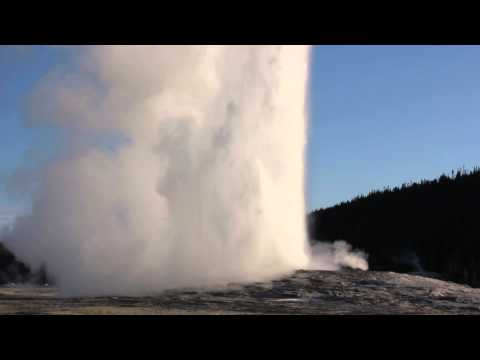

In [3]:
# Для довідки: для підлючення YouTube відео в
# Jupyter notebook аргументом є ідентифікатор для такого відео з відповідного URL:
# https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Деякі виверження Old Faithful тривають довше, ніж інші. При тривалому виверженні зазвичай доводиться довше чекати наступного виверження.

Якщо Ви відвідаєте Йеллоустоун або будете спостерігати on-line, то можете передбачити, коли буде наступне виверження, аби перевірити себе та прийти вчасно аби спостерігати за гейзером, коли він "прокинеться". Щоб спрогнозувати одну змінну через іншу, першим кроком є розуміння зв'язку між ними.

Набір даних має один рядок для кожного виверження, що спостерігається. Він включає наступні стовпці:
- **duration**: тривалість виверження, у хвилинах
- **wait**: час між цим виверженням та наступним, також у хвилинах

Запустіть наступну комірку, щоб завантажити набір даних.

In [24]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


** <b>Завдання 1.1</b> **
<br/>
Побудуйте діаграму розсіювання даних (`scatter`). Зазвичай параметр (стовпець), який ми спробуємо передбачити (час між виверженням), відкладаємо на вертикальну вісь, а інший параметр (стовпець) – на горизонтальну вісь.

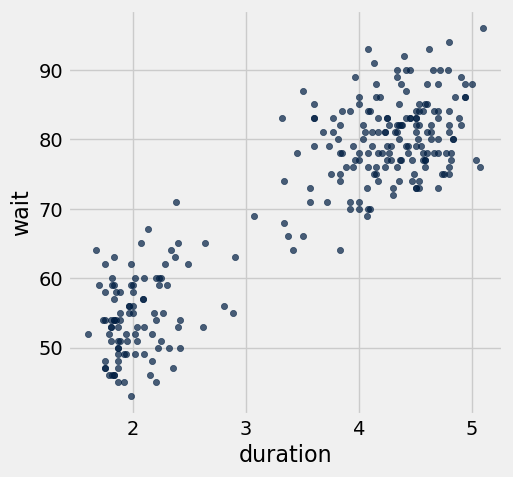

In [25]:
faithful.scatter('duration', 'wait')

Подивіться на графік розсіювання. Чи є зв'язок між часом очікування та тривалістю виверження лінійним і чи є зв'язок взагалі?

Спостерігається щось більше, ніж лінійна залежність. Тривалість вивержень, здається, групується; є група коротких вивержень і група довших. Усередині кожного з кластерів ці значення здаються приблизно лінійно корельованими, але можливо з іншим коефіцієнтом кореляції.

Загальний зв'язок є позитивним, що означає, що більш тривалі виверження мають триваліший час очікування. Навіть коли зв'язок складніший, ніж проста лінійна залежність, ми все одно можемо обчислити кореляцію.

Спочатку ми будемо переводити дані в стандартні одиниці. Згадайте, якщо `nums` є масивом чисел, то

    (nums - np.mean(nums)) / np.std(nums)

...це масив цих чисел у стандартних одиницях.

** <b>Завдання 1.2</b> **
<br/>
Обчисліть середнє значення та стандартне відхилення тривалості виверження та часу очікування.  **Потім** створіть таблицю під назвою `faithful_standard` яка містить тривалість виверження та час очікування в стандартних одиницях.  (Стовпці повинні бути названі `"duration (standard units)"` та `"wait (standard units)"`.

In [26]:
duration_mean = np.mean(faithful.column(0))
duration_std = np.std(faithful.column(0))
wait_mean = np.mean(faithful.column(1))
wait_std = np.std(faithful.column(1))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column('duration') - duration_mean)/duration_std,
    "wait (standard units)", (faithful.column('wait') - wait_mean)/wait_std)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


In [27]:
check('tests/q1_2.py')

** <b>Завдання 1.3</b> **
<br/>
Знову діаграму розсіювання даних (`scatter`), але цього разу в стандартних одиницях.

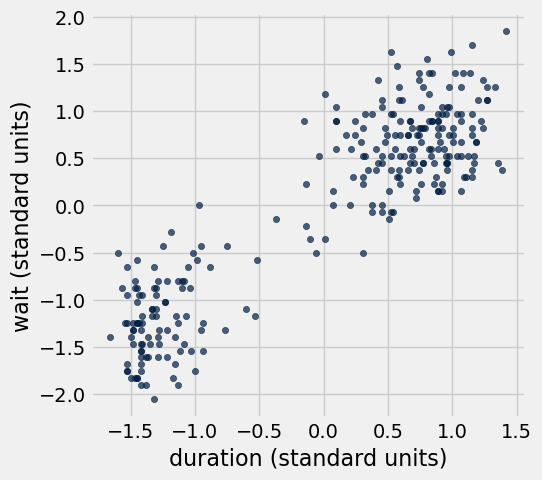

In [31]:
faithful_standard.scatter('duration (standard units)', 'wait (standard units)')

Як Ви можете помітити, ця діаграма розсіювання виглядає так само, як і попередня!  Дані насправді різні, але осі масштабуються по-різному.  (Метод `scatter` масштабує осі так, що дані заповнюють доступний простір.)  Тому важливо читати поділки на вісях.

** <b>Завдання 1.4</b> **
<br/>
Яке з наступних чисел, на вашу думку, найближче відповідає кореляції між тривалістю виверження та часом очікування у цьому наборі даних? Оцініть за діаграмою розсіювання.

* -1
* 0
* 1

Запишіть свою здогадку у змінну `closest_correlation`.

In [32]:
closest_correlation = 1

In [33]:
check('tests/q1_4.py')

** <b>Завдання 1.5</b> **
<br/>
Обчисліть кореляцію `r`.  *Підказка:* Використайте `faithful_standard`.  Скористайтеся лекцією, або іншими джерелами, наприклад https://inferentialthinking.com/chapters/15/1/Correlation.html.

In [34]:
r = np.average(faithful_standard.column(0)*faithful_standard.column(1))
r

0.90081116832181318

In [35]:
check('tests/q1_5.py')

## 2.  Варіабельність середнього значення вибірки

Відповідно до центральної граничної теореми розподіл ймовірностей середнього значення великої випадкової вибірки є нормальним. Нормальна крива центрується відносно середнього за всією сукупністю. Деякі з середніх за вибірками вище, а деякі нижче, але відхилення від середнього значення генеральної сукупності приблизно симетричні в обидві боки, як ми неодноразово бачили. Формально теорія ймовірностей показує, що середнє значення вибірки є незміщеною оцінкою середнього значення генеральної сукупності.

У наших прикладах ми також помічали, що середні значення великих вибірок, як правило, щільніше згруповані навколо середнього значення генеральної сукупності, ніж середні значення менших вибірок. У цьому розділі ми оцінимо варіабельність середнього значення вибірки і визначемо зв'язок між варіабельністю і розміром вибірки.

Давайте подивимося, наприклад, на відстань між обраними точками для уявного варіограмного аналізу даних (для h-графіків).

In [36]:
distances = Table.read_table('point_distance.csv').select("distance")
distances

distance
471953
390112
339654
326717
326233
344187
311299
310161
335485
329391


In [37]:
distance_mean = np.mean(distances.column('distance'))
distance_mean

75463.918140230307

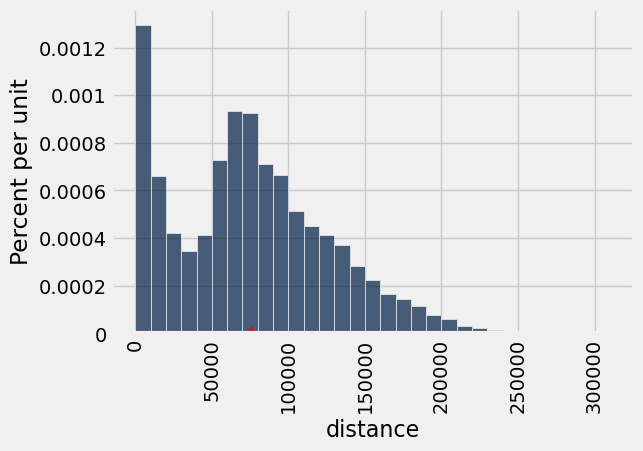

In [39]:
distances.hist('distance', bins=np.arange(0, 300000+10000*2, 10000))
plots.scatter(distance_mean, 0, marker='^', color='red', s=100);

** <b>Завдання 2.1</b> **
<br/>
Зрозуміло, що генеральна сукупність не підпорядковується нормальному розподілу. Майте це на увазі, коли ми будемо виконувати ці завдання.

Давайте візьмемо випадкові вибірки та подивимося на розподіл ймовірностей середнього значення вибірки. Як і раніше, ми будемо використовувати моделювання, щоб отримати емпіричну апроксимацію цього розподілу.

Для цього ми визначимо функцію `simulate_sample_mean` оскільки нижче ми збираємося змінювати розмір вибірки для моделювання. Аргументами функції є: назва таблиці, назва стовпця який містить параметр, розмір вибірки, кількість симуляцій.

"Допишіть" функцію `simulate_sample_mean`. Ви не зможете виконати подальші кроки, якщо не доробити функцію належним чином, тому це завдання є критичним.

In [72]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = []

    for i in np.arange(repetitions):
        new_sample = table.sample(sample_size, with_replacement = False).column(label)
        new_sample_mean = np.mean(new_sample)
        means.append(new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

** <b>Завдання 2.2</b> **
<br/>
У наступній клітинці ми створимо вибірку розміром 100 із таблиці відстаней і побудуємо її діаграму розсіювання за допомогою нашої нової функції `simulate_sample_mean`.

Sample size:  100
Population mean: 75463.9181402
Average of sample means:  75501.603415
Population SD: 51697.0349865
SD of sample means: 5140.74860644


(50000.0, 100000.0)

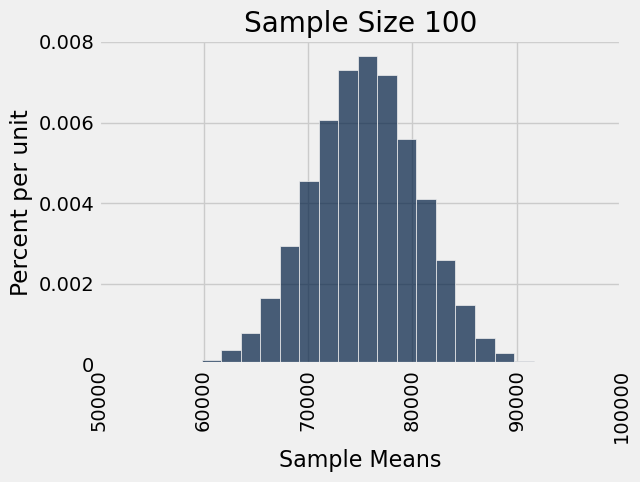

In [73]:
simulate_sample_mean(distances, 'distance', 100, 10000) 
plots.xlim(50000, 100000)

У наступних двох клітинках змоделюйте середнє значення випадкової вибірки з 400 відстаней та 625 відстаней, відповідно. У кожному випадку виконайте 10 000 симуляцій для кожного з цих двох моделювань. Не турбуйтеся про рядок `plots.xlim` – він лише для того, аби гарантувати, що всі графіки матимуть однакову вісь x.

Sample size:  400
Population mean: 75463.9181402
Average of sample means:  75472.8146004
Population SD: 51697.0349865
SD of sample means: 2577.13865688


(50000.0, 100000.0)

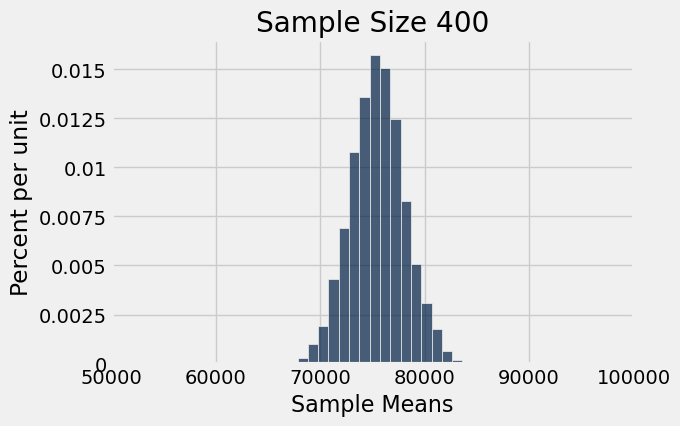

In [74]:
simulate_sample_mean(distances, 'distance', 400, 10000)
plots.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(distances, 'distance', 625, 10000)
plots.xlim(50000, 100000)

Ми бачимо центральну граничну теорему в дії – гістограми вибіркових середніх є приблизно нормальними, навіть якщо гістограма самих відстаней далека від нормальної.

Ми також бачимо, що кожна з трьох гістограм вибіркових середніх центрована дуже близько до середнього генеральної сукупності. У кожному випадку «середнє середніх значень вибірки» дуже близько до середнього значення сукупності. Обидва значення віведено під кожною гістограмою, порівняйте їх. Як і очікувалося, середнє значення вибірки є незміщеною оцінкою середнього значення генеральної сукупності.

** <b>Завдання 2.3</b> **
<br/>
Нижче ми розглянемо, що відбувається, коли беремо фіксовану вибірку, а потім використовуємо її з різною кількістю повторних симуляцій. Як зміниться розподіл перерахованих середніх?

In [ ]:
simulate_sample_mean(distances, 'distance', 100, 1000)
plots.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(distances, 'distance', 100, 5000)
plots.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(distances, 'distance', 100, 10000)
plots.xlim(50000, 100000)

Присвойте змінній `bootstrap_sampled_SD` ціле число, що відповідає вашій відповіді на наступне запитання:

Якщо ми збільшуємо кількість симуляцій початкової вибірки (фіксованого розміру вибірки), то SD середнього значення вибірки буде...

1. Зростати
2. Зменшуватися
3. Залишатися приблизно таким самим
4. Широко варіювати

In [ ]:
bootstrap_sampled_SD = ...

In [ ]:
simulate_sample_mean(distances, 'distance', 100, 500)
plots.xlim(50000, 100000)

In [ ]:
check('tests/q2_3.py')

** <b>Завдання 2.4</b> **
<br/>
Далі, давайте подумаємо про те, як відношення між SD генеральної сукупності, SD вибірки та SD середнього значення вибірки змінюються при зміні розміру вибірки. Яке з наступних тверджень є вірним? Присвойте змінній `pop_vs_sample` ціле число, що відповідає вашій відповіді на запитання. Щоб отримати деяку підказку, ви можете запустити моделювання в клітинках нижче.

1. SD вибірки зменшується зі збільшенням розміру вибірки, SD середнього значення вибірки зменшується зі збільшенням розміру вибірки.
2. SD вибірки збільшується зі збільшенням розміру вибірки, SD середнього значення вибірки залишається незмінним із збільшенням розміру вибірки.
3. SD вибірки стає більш схожим з SD генеральної сукупності зі збільшенням розміру вибірки, SD середнього значення вибірки стає менше зі збільшенням розміру вибірки.
4. SD вибірки стає більш схожим із SD генеральної сукупності зі збільшенням розміру вибірки, SD середнього значення вибірки залишається незмінним із збільшенням розміру вибірки.

In [ ]:
pop_vs_sample = ...

In [ ]:
check('tests/q2_4.py')

Погляньмо, що відбудеться: по-перше, ми обчислюємо SD генеральної сукупності, щоб ми могли порівняти SD кожної вибірки з SD генеральної сукупності.

In [ ]:
pop_sd = np.std(distances.column("distance"))
pop_sd

Далі подивимося як поведе себе невелика вибірка. Запустіть наступні комірки кілька разів, щоб побачити, як змінюється SD вибірки від вибірки до вибірки. Налаштуйте вибірку за необхідності.

In [ ]:
sample_10 = distances.sample(10)
sample_10.hist("distance")
print("Sample SD: ", np.std(sample_10.column("distance")))
simulate_sample_mean(sample_10, 'distance', 10, 1000)
plots.xlim(5,120000)
plots.ylim(0, .0001);

In [ ]:
sample_200 = distances.sample(200)
sample_200.hist("distance")
print("Sample SD: ", np.std(sample_200.column("distance")))
simulate_sample_mean(sample_200, 'distance', 200, 1000)
plots.xlim(5,100000)
plots.ylim(0, .00015);

In [ ]:
sample_1000 = distances.sample(1000)
sample_1000.hist("distance")
print("Sample SD: ", np.std(sample_1000.column("distance")))
simulate_sample_mean(sample_1000, 'distance', 1000, 1000)
plots.xlim(5,100000)
plots.ylim(0, .00025);

Проілюструємо цю тенденцію. Нижче ви побачите, як середня абсолютна помилка SD для генеральної сукупності змінюється залежно від розміру вибірки (N).

In [ ]:
# Don't change this cell, just run it!
sample_n_errors = make_array()
for i in np.arange(10, 200, 10):
    sample_n_errors = np.append(sample_n_errors, np.average([abs(np.std(distances.sample(i).column("distance"))-pop_sd)
                                                             for d in np.arange(100)]))
Table().with_columns("Average absolute error in SD", sample_n_errors, "N", np.arange(10, 200, 10)).plot("N", "Average absolute error in SD")



Ви повинні помітити, що розподіл середніх робиться спадаючим, і що розподіл вибірки дедалі більше схожий на розподіл генеральної сукупності зі збільшенням розміру вибірки.

Чи є зв'язок між розміром вибірки та абсолютною помилкою стандартного відхилення? Визначте цей зв'язок — якщо у вас виникли питання, перегляньте  за посиланням https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html

## Контроль

Ви закінчили з даною частиною практичної роботи! Аби перевірити, що всі завдання виконані вірно, виконайте наступні дії...
- **ВАЖЛИВО** Перш ніж щось робити, виберіть, **Save and Checkpoint** з меню `File`. Будь ласка, зробіть це спочатку, перш ніж запускати клітинку нижче,
- **запустіть усі тести та перевірте, чи всі вони пройшли успішно** (у наступній клітинці є перевірка для цього), 
- **Перегляньте notebook востаннє, перевірятися буде остаточний стан вашого notebook. Якщо ви вносили будь-які зміни, збережіть і запустіть всі рядки ще раз** Якщо ви вносили будь-які зміни, запустіть поллідовно всі рядки ще раз і збережіть **Save and Checkpoint** повторно.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('pr2_4.ipynb', sorted(glob.glob('tests/q*.py'))))